#### 1. 라이브러리 및 데이터 불러오기

In [84]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [85]:
train_data = pd.read_csv('train.csv', encoding='cp949')
test_data = pd.read_csv('test_x.csv', encoding='cp949')

In [86]:
train_data[['QaE','QbE','QcE', 'QdE','QeE','QfE','QgE','QhE','QmE']] .describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QmE
count,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04
mean,9.453570e+02,2.189589e+03,1484.294518,1.490672e+03,1.899292e+03,1.850650e+03,1.284608e+03,4.584272e+03,2.050287e+03
std,1.307565e+04,3.351027e+04,8977.664318,1.092260e+04,1.670765e+04,7.608236e+04,9.756584e+03,5.020265e+05,7.530787e+04
min,2.500000e+01,2.500000e+01,25.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,0.000000e+00,2.500000e+01
25%,4.040000e+02,8.750000e+02,651.000000,6.790000e+02,8.340000e+02,5.040000e+02,5.490000e+02,1.077000e+03,6.500000e+02
50%,5.570000e+02,1.218000e+03,899.000000,9.310000e+02,1.154000e+03,7.120000e+02,7.720000e+02,1.464000e+03,9.060000e+02
75%,8.270000e+02,1.838000e+03,1335.000000,1.355000e+03,1.656000e+03,1.078000e+03,1.150000e+03,2.090000e+03,1.342000e+03
max,2.413960e+06,5.580395e+06,871557.000000,1.552821e+06,1.919926e+06,1.176370e+07,1.068252e+06,1.070860e+08,1.410832e+07


#### 2. 컬럼중 명목형 변수로 구성되어 있는 지 체크
- (조사 결과, race, religion, gender, age_group 이 그러함)

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

#### 3. index와 QaE~QtE와 같은 연속적인 데이터를 제외한 상태에서 각 컬럼에 대한 value_counts 진행
- (github 특성상 너무 길게 나와 print 항목 비활성화)
- 분석1. 일종의 결측치와 같은 무응답이 순서형 변수 0으로 되어있는 컬럼들  :  hand, urban, education, engnat, married
- 분석2. 순서형 변수 형태를 띄고 있으나, 실제로 숫자 크기에 따라 의미가 없는 컬럼들 : education, engnat, urban, hand, married
- 분석3. 일부 정상적인 범위를 벗어나는 항목 : familysize (일부 형제자매수가 100을 가히 넘는 숫자 999, 100, 2147483647을 포함하고 있음)

In [88]:
train_value_counts = train_data.drop(['index','QaE','QbE','QcE', 'QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE'], axis=1)
#for i in train_value_counts.columns:
    #print(pd.DataFrame(train_data[i].value_counts()))

In [89]:
test_value_counts = test_data.drop(['index','QaE','QbE','QcE', 'QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE'], axis=1)
#for i in test_value_counts.columns:
    #print(pd.DataFrame(test_data[i].value_counts()))

#### 4. education 컬럼 확인 및 전처리 
- 결론적으로, 순서형 변수가 아니기 때문에 모두 명목형 변수로 변환, 0의 경우 무응답이라 결측치 처리

In [90]:
#수정을 위한 데이터 생성
train_data2 = train_data.copy()

In [91]:
test_data2 = test_data.copy()

In [92]:
train_data['education'].value_counts()

2    16835
3    15227
4     7854
1     5088
0      528
Name: education, dtype: int64

In [93]:
train_data['education'].mean()

2.544474215936045

In [94]:
pd.crosstab(train_data.education, train_data.voted)

voted,1,2
education,,
0,252,276
1,253,4835
2,6179,10656
3,9083,6144
4,4867,2987


In [95]:
pd.crosstab(train_data.education, train_data.voted, normalize=True)

voted,1,2
education,,
0,0.005535,0.006062
1,0.005557,0.106189
2,0.135707,0.234033
3,0.199486,0.134938
4,0.106892,0.065602


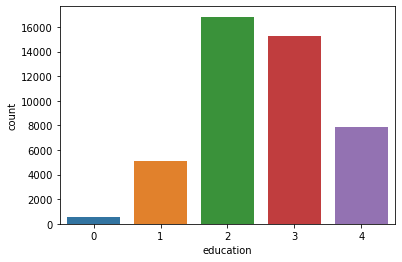

In [96]:
sns.countplot('education',data=train_data)
plt.show()

In [97]:
train_data2['education'] = train_data2['education'].replace( 1, 'Less than high school')
train_data2['education'] = train_data2['education'].replace( 2, 'High school')
train_data2['education'] = train_data2['education'].replace( 3, 'University degree')
train_data2['education'] = train_data2['education'].replace( 4, 'Graduate degree' )
train_data2['education'] = train_data2['education'].replace( 0,  np.nan )

In [98]:
test_data2['education'] = test_data2['education'].replace( 1, 'Less than high school')
test_data2['education'] = test_data2['education'].replace( 2, 'High school')
test_data2['education'] = test_data2['education'].replace( 3, 'University degree')
test_data2['education'] = test_data2['education'].replace( 4, 'Graduate degree' )
test_data2['education'] = test_data2['education'].replace( 0,  np.nan )

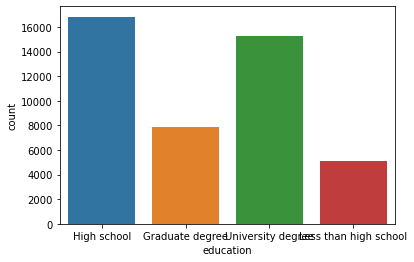

In [99]:
sns.countplot('education',data=train_data2)

#### 5. engnat 컬럼 전처리
- 결론적으로, 모국어가 영어이면 1, 모국어가 영어아니면 0으로 변경
- 2의 경우 무응답이라 결측치 처리

In [100]:
train_data['engnat'].value_counts()

1    33024
2    12431
0       77
Name: engnat, dtype: int64

In [101]:
pd.crosstab(train_data.engnat, train_data.voted, normalize=True)

voted,1,2
engnat,,
0,0.000637,0.001054
1,0.335522,0.389770
2,0.117017,0.156000


In [102]:
###모국어가 영어이면 1, 모국어가 영어아니면 0으로 변경(무응답은 결측치로 변경)

In [103]:
train_data2['engnat'] = train_data2['engnat'].replace( 0, np.nan)
train_data2['engnat'] = train_data2['engnat'].replace( 2, 0)

In [104]:
test_data2['engnat'] = test_data2['engnat'].replace( 0, np.nan)
test_data2['engnat'] = test_data2['engnat'].replace( 2, 0)

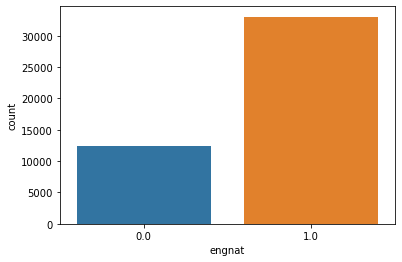

In [105]:
sns.countplot('engnat',data=train_data2)
plt.show()

#### 6. urban 컬럼 전처리
- 결론적으로, 순서형 변수가 아니기 때문에 모두 명목형 변수로 변환, 0의 경우 무응답이라 결측치 처리

In [106]:
train_data['urban'].value_counts()

2    18534
3    17767
1     8909
0      322
Name: urban, dtype: int64

In [107]:
pd.crosstab(train_data.urban, train_data.voted, normalize=True)

voted,1,2
urban,,
0,0.003602,0.003470
1,0.099227,0.096438
2,0.186616,0.220438
3,0.163731,0.226478


In [108]:
train_data2['urban'] = train_data2['urban'].replace( 0, np.nan)
train_data2['urban'] = train_data2['urban'].replace( 1, 'Rural')
train_data2['urban'] = train_data2['urban'].replace( 2, 'Suburban')
train_data2['urban'] = train_data2['urban'].replace( 3, 'Urban')

In [109]:
test_data2['urban'] = test_data2['urban'].replace( 0, np.nan)
test_data2['urban'] = test_data2['urban'].replace( 1, 'Rural')
test_data2['urban'] = test_data2['urban'].replace( 2, 'Suburban')
test_data2['urban'] = test_data2['urban'].replace( 3, 'Urban')

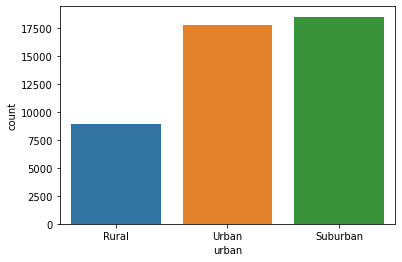

In [110]:
sns.countplot('urban',data=train_data2)

#### 7. hand 컬럼 전처리
- 결론적으로, 순서형 변수가 아니기 때문에 모두 명목형 변수로 변환, 0의 경우 무응답이라 결측치 처리

In [111]:
train_data['hand'].value_counts()

1    39058
2     4692
3     1621
0      161
Name: hand, dtype: int64

In [112]:
pd.crosstab(train_data.hand, train_data.voted, normalize=True)

voted,1,2
hand,,
0,0.001296,0.002240
1,0.390033,0.467781
2,0.047351,0.055697
3,0.014495,0.021106


In [113]:
train_data2['hand'] = train_data2['hand'].replace( 0, np.nan)
train_data2['hand'] = train_data2['hand'].replace( 1, 'Right')
train_data2['hand'] = train_data2['hand'].replace( 2, 'Left')
train_data2['hand'] = train_data2['hand'].replace( 3, 'Both')

In [114]:
test_data2['hand'] = test_data2['hand'].replace( 0, np.nan)
test_data2['hand'] = test_data2['hand'].replace( 1, 'Right')
test_data2['hand'] = test_data2['hand'].replace( 2, 'Left')
test_data2['hand'] = test_data2['hand'].replace( 3, 'Both')

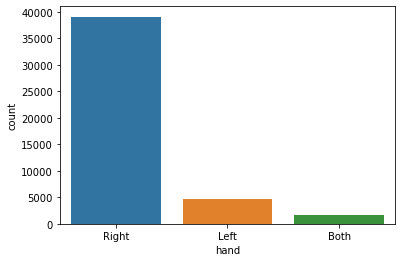

In [115]:
sns.countplot('hand',data=train_data2)

#### 8. married 전처리
- 결론적으로, 순서형 변수가 아니기 때문에 모두 명목형 변수로 변환, 0의 경우 무응답이라 결측치 처리

In [116]:
train_data2['married'] = train_data2['married'].replace( 0, 'Other')
train_data2['married'] = train_data2['married'].replace( 1, 'Never Married')
train_data2['married'] = train_data2['married'].replace( 2, 'Currently Married')
train_data2['married'] = train_data2['married'].replace( 3, 'Previously Married')

In [117]:
test_data2['married'] = test_data2['married'].replace( 0, 'Other')
test_data2['married'] = test_data2['married'].replace( 1, 'Never Married')
test_data2['married'] = test_data2['married'].replace( 2, 'Currently Married')
test_data2['married'] = test_data2['married'].replace( 3, 'Previously Married')

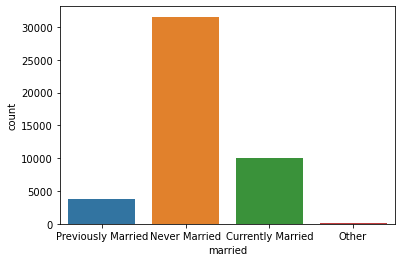

In [118]:
sns.countplot('married',data=train_data2)

In [119]:
train_data2['married'].value_counts()

Never Married         31550
Currently Married     10059
Previously Married     3830
Other                    93
Name: married, dtype: int64

#### 9. familysize 전처리
- 형제자매수가 0인경우 특이점이 있을 경우를 고려해 외동여부 컬럼 생성
- 형제자매수가 100이상인 경우 이상치로 판단하여 결측치 처리

In [120]:
train_data2['familysize'].value_counts()

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
16                2
20                2
999               1
100               1
34                1
18                1
2147483647        1
30                1
Name: familysize, dtype: int64

In [121]:
train_data2.loc[ train_data2['familysize']==0, 'nobrothersister' ] = 1
train_data2.loc[ train_data2['familysize']!=0, 'nobrothersister' ] = 0

In [122]:
train_data2.loc[ train_data2['familysize']> 100 , 'familysize' ] = np.nan

In [123]:
test_data2.loc[ test_data2['familysize']> 100 , 'familysize' ] = np.nan

In [124]:
train_data2['familysize'].value_counts()

2.0      17918
3.0      11256
1.0       6535
4.0       4907
5.0       1962
0.0       1217
6.0        838
7.0        387
8.0        221
9.0        126
10.0        59
11.0        39
12.0        21
13.0        11
14.0         9
15.0         8
17.0         3
44.0         3
20.0         2
16.0         2
21.0         2
18.0         1
100.0        1
34.0         1
30.0         1
Name: familysize, dtype: int64

#### 10. Tipi 컬럼 전처리
- 현재 컬럼내의 항목의 값들은  [  7  -  기존의 Tipi 컬럼 선택지 항목에서의 값 ] 이 들어가 있기 때문에 추후 관련 다양한 변수들을 만들어내는데 불리하다. 다시 원래대로 항목의 값들을 되돌려줄 예정이다

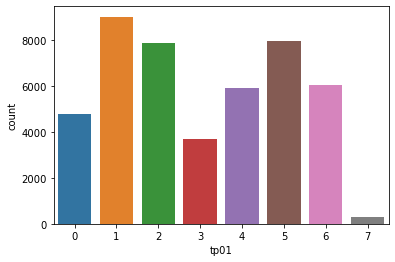

In [125]:
sns.countplot('tp01',data=train_data2)

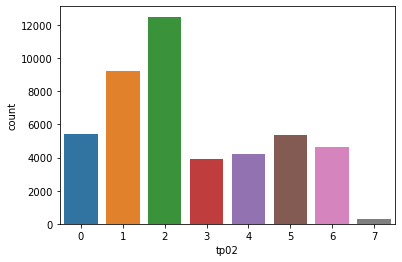

In [126]:
sns.countplot('tp02',data=train_data2)

In [127]:
train_data2['tp01'] = 7 - train_data2['tp01']
train_data2['tp02'] = 7 - train_data2['tp02']
train_data2['tp03'] = 7 - train_data2['tp03']
train_data2['tp04'] = 7 - train_data2['tp04']
train_data2['tp05'] = 7 - train_data2['tp05']
train_data2['tp06'] = 7 - train_data2['tp06']
train_data2['tp07'] = 7 - train_data2['tp07']
train_data2['tp08'] = 7 - train_data2['tp08']
train_data2['tp09'] = 7 - train_data2['tp09']
train_data2['tp10'] = 7 - train_data2['tp10']

In [128]:
test_data2['tp01'] = 7 - test_data2['tp01']
test_data2['tp02'] = 7 - test_data2['tp02']
test_data2['tp03'] = 7 - test_data2['tp03']
test_data2['tp04'] = 7 - test_data2['tp04']
test_data2['tp05'] = 7 - test_data2['tp05']
test_data2['tp06'] = 7 - test_data2['tp06']
test_data2['tp07'] = 7 - test_data2['tp07']
test_data2['tp08'] = 7 - test_data2['tp08']
test_data2['tp09'] = 7 - test_data2['tp09']
test_data2['tp10'] = 7 - test_data2['tp10']

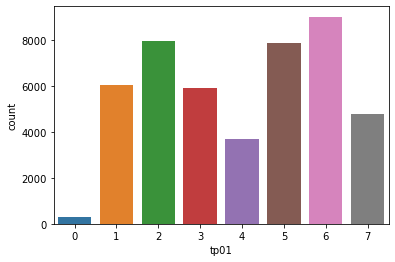

In [129]:
sns.countplot('tp01',data=train_data2)

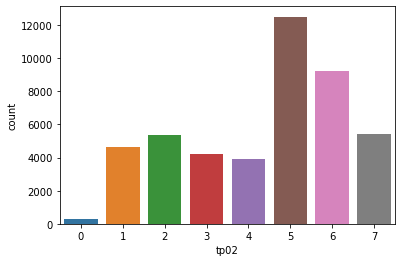

In [130]:
sns.countplot('tp02',data=train_data2)

In [131]:
train_data2['tp01'] = train_data2['tp01'].replace(0, np.nan)
train_data2['tp02'] = train_data2['tp02'].replace(0, np.nan)
train_data2['tp03'] = train_data2['tp03'].replace(0, np.nan)
train_data2['tp04'] = train_data2['tp04'].replace(0, np.nan)
train_data2['tp05'] = train_data2['tp05'].replace(0, np.nan)
train_data2['tp06'] = train_data2['tp06'].replace(0, np.nan)
train_data2['tp07'] = train_data2['tp07'].replace(0, np.nan)
train_data2['tp08'] = train_data2['tp08'].replace(0, np.nan)
train_data2['tp09'] = train_data2['tp09'].replace(0, np.nan)
train_data2['tp10'] = train_data2['tp10'].replace(0, np.nan)

In [132]:
test_data2['tp01'] = test_data2['tp01'].replace(0, np.nan)
test_data2['tp02'] = test_data2['tp02'].replace(0, np.nan)
test_data2['tp03'] = test_data2['tp03'].replace(0, np.nan)
test_data2['tp04'] = test_data2['tp04'].replace(0, np.nan)
test_data2['tp05'] = test_data2['tp05'].replace(0, np.nan)
test_data2['tp06'] = test_data2['tp06'].replace(0, np.nan)
test_data2['tp07'] = test_data2['tp07'].replace(0, np.nan)
test_data2['tp08'] = test_data2['tp08'].replace(0, np.nan)
test_data2['tp09'] = test_data2['tp09'].replace(0, np.nan)
test_data2['tp10'] = test_data2['tp10'].replace(0, np.nan)

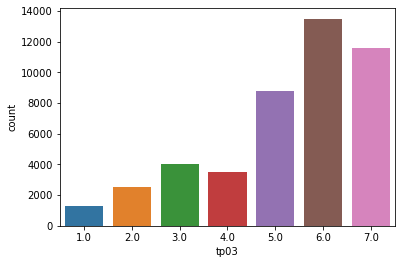

In [133]:
sns.countplot('tp03',data=train_data2)

#### 11. tp데이터 추가적인 변수 생성
- TIPI 지표 평가 관련자료를 참여하여 새로운 변수를 추가하였다

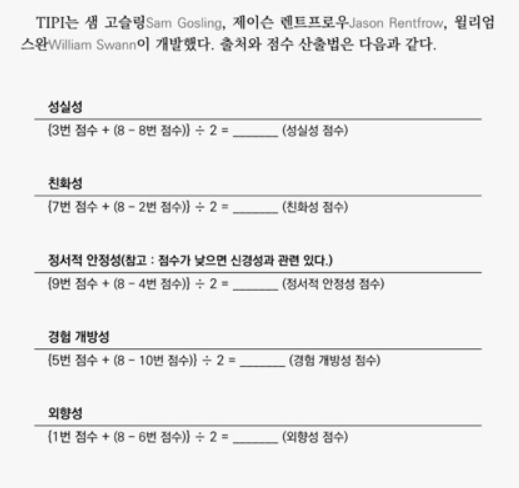

In [134]:
train_data2['tp_Sincerity'] = ( train_data2['tp03'] + 8 - train_data2['tp08'] ) / 2
train_data2['tp_Affinity'] = ( train_data2['tp07'] + 8 - train_data2['tp02'] ) / 2
train_data2['tp_Emotional Stability'] = ( train_data2['tp09'] + 8 - train_data2['tp04'] ) / 2
train_data2['tp_Experience Openess'] = ( train_data2['tp05'] + 8 - train_data2['tp10'] ) / 2
train_data2['tp_Extrovertness'] = ( train_data2['tp01'] + 8 - train_data2['tp06'] ) / 2

In [135]:
test_data2['tp_Sincerity'] = ( test_data2['tp03'] + 8 - test_data2['tp08'] ) / 2
test_data2['tp_Affinity'] = ( test_data2['tp07'] + 8 - test_data2['tp02'] ) / 2
test_data2['tp_Emotional Stability'] = ( test_data2['tp09'] + 8 - test_data2['tp04'] ) / 2
test_data2['tp_Experience Openes'] = ( test_data2['tp05'] + 8 - test_data2['tp10'] ) / 2
test_data2['tp_Extrovertness'] = ( test_data2['tp01'] + 8 - test_data2['tp06'] ) / 2

In [136]:
train_data2.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'nobrothersister', 'tp_Sincerity', 'tp_Affinity',
       'tp_Emotional Stability', 'tp_Experience Openess', 'tp_Extrovertness'],
      dtype='object')

In [137]:
test_data2.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'tp_Sincerity', 'tp_Affinity', 'tp_Emotional Stability',
       'tp_Experience Openes', 'tp_Extrovertness'],
      dtype='object')

#### 12. 마키아밸리 점수 계산
- "QaA", "QdA", "QgA", "QiA", "QnA"이 타 질문들과 음의 관계를 가지고 있어, 6 - train_data2[i]으로 형태를 변환한다

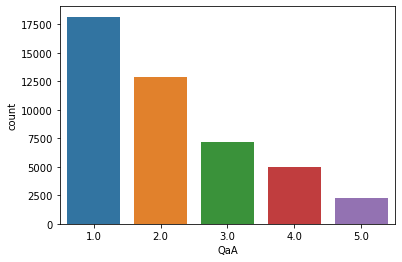

In [138]:
sns.countplot('QaA',data=train_data2)

In [139]:
for i in ["QaA", "QdA", "QgA", "QiA", "QnA"]:
    train_data2[i] = 6 - train_data2[i]
    test_data2[i] = 6 - test_data2[i]

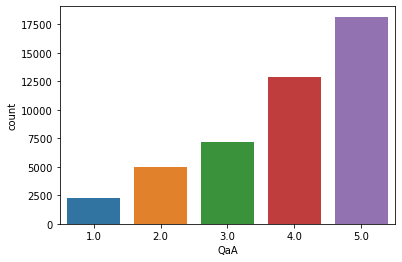

In [140]:
sns.countplot('QaA',data=train_data2)

In [141]:
train_data2['Machiavelli Score'] = train_data2[ ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']].mean(axis=1)

In [142]:
test_data2['Machiavelli Score'] = test_data2[ ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']].mean(axis=1)

#### 13. 허구인 단어의 정의를 앎, 실존하는 해당 단어의 정의을 앎 관련 변수 전처리
- 관련 자료가 없어, 최대한 창의적으로 변수를 생성하였다

In [143]:
train_data2['wf_sum'] = train_data2['wf_01'] + train_data2['wf_02'] + train_data2['wf_03']
train_data2['wr_sum'] = train_data2['wr_01'] + train_data2['wr_02'] + train_data2['wr_03'] + train_data2['wr_04'] + train_data2['wr_05'] + train_data2['wr_06'] + train_data2['wr_07'] + train_data2['wr_08'] + train_data2['wr_09'] + train_data2['wr_10'] + train_data2['wr_11'] + train_data2['wr_12'] + train_data2['wr_13']
train_data2['wfr_sum'] = train_data2['wf_sum'] + train_data2['wr_sum']
train_data2['wfr_minus'] = train_data2['wf_sum'] - train_data2['wr_sum']


#### 14. 명목형 변수 인코딩

In [144]:
train_data3 = pd.get_dummies(train_data2)
test_data3 = pd.get_dummies(test_data2)

In [145]:
# train_data3 = train_data2.copy()
# test_data3 = test_data2.copy()

In [146]:
train_data3.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       ...
       'religion_Christian_Other', 'religion_Christian_Protestant',
       'religion_Hindu', 'religion_Jewish', 'religion_Muslim',
       'religion_Other', 'religion_Sikh', 'urban_Rural', 'urban_Suburban',
       'urban_Urban'],
      dtype='object', length=123)

In [147]:
for  i in test_data3.columns:
    print(i)

index
QaA
QaE
QbA
QbE
QcA
QcE
QdA
QdE
QeA
QeE
QfA
QfE
QgA
QgE
QhA
QhE
QiA
QiE
QjA
QjE
QkA
QkE
QlA
QlE
QmA
QmE
QnA
QnE
QoA
QoE
QpA
QpE
QqA
QqE
QrA
QrE
QsA
QsE
QtA
QtE
engnat
familysize
tp01
tp02
tp03
tp04
tp05
tp06
tp07
tp08
tp09
tp10
wf_01
wf_02
wf_03
wr_01
wr_02
wr_03
wr_04
wr_05
wr_06
wr_07
wr_08
wr_09
wr_10
wr_11
wr_12
wr_13
tp_Sincerity
tp_Affinity
tp_Emotional Stability
tp_Experience Openes
tp_Extrovertness
Machiavelli Score
age_group_+70s
age_group_10s
age_group_20s
age_group_30s
age_group_40s
age_group_50s
age_group_60s
education_Graduate degree
education_High school
education_Less than high school
education_University degree
gender_Female
gender_Male
hand_Both
hand_Left
hand_Right
married_Currently Married
married_Never Married
married_Other
married_Previously Married
race_Arab
race_Asian
race_Black
race_Indigenous Australian
race_Native American
race_Other
race_White
religion_Agnostic
religion_Atheist
religion_Buddhist
religion_Christian_Catholic
religion_Christian_Mormon
reli

#### 15. index 컬럼 제거
-유의미한 변수로 사용될 수 없는 index 컬럼을 제거하였다

In [148]:
train_data3 = train_data3.drop('index', axis=1)
test_data3 = test_data3.drop('index', axis=1)

In [149]:
# train_data3 = train_data3.drop(['race_Black','religion_Muslim','race_Indigenous Australian', 'race_Arab','religion_Jewish','religion_Christian_Mormon'
# ,'married_Other','hand_Right','wr_08','hand_Left','hand_Both','wr_10','wr_12','wr_07','religion_Sikh','wr_12','wr_07','wf_03' ]
# , axis=1)

In [150]:
# test_data3 = test_data3.drop(['race_Black','religion_Muslim','race_Indigenous Australian', 'race_Arab','religion_Jewish','religion_Christian_Mormon'
# ,'married_Other','hand_Right','wr_08','hand_Left','hand_Both','wr_10','wr_12','wr_07','religion_Sikh','wr_12','wr_07','wf_03' ]
# , axis=1)

In [151]:
# selected_data = train_data3[['voted','race_Asian','race_White','age_group_10s','education_High school', 'education_Less than high school','engnat','tp_Emotional Stability','tp06','education_University degree','age_group_20s','tp_Sincerity','married_Currently Married','wr_06','religion_Other','married_Never Married']]
# train_data3 = selected_data.copy()